NAMES & IDs: 
Bryant Liu - A13458492
Jingyao Chen - A92071265
Joseph D’Angelo - A13580892
Tammy Lee - A13573330

OVERVIEW: 
Include 3-4 sentences summarizing your group’s project 

RESEARCH QUESTION: 
What is your research question? (1-2 sentences) 

HYPOTHESIS: 
What is your main hypothesis and predictions? Briefly explain why. (2-3 sentences) 

BACKGROUND & PRIOR WORK: Why is this question of interest to your group? What background information led you to your hypothesis. Why is this important? 
Find some relevant prior work, and reference those sources. Even if you think you have a totally novel question, find the most similar prior work that you can and discuss how it relates to your project. 
References can be research publications, but they need not be. Blogs, GitHub repositories, company websites, etc., are all viable references if they are relevant to your project. (2-3 paragraphs, including at least 2 references) 




DATASET(S): 
What data will you use to answer your question? Describe the dataset(s) in terms of number of observations, what kind of features it contains, etc. You must use at least one dataset containing at least approximately 1000 observations (if your data are smaller but you feel they are sufficient, email Prof. Ellis). You are welcome (and in fact recommended) to find multiple datasets! If you do so, describe each one, and briefly explain how you will combine them together. Include the source of the dataset in the description here. 

DATA CLEANING: 
What methods did you use to analyze your data? Briefly explain what steps you had to take before you were able to use the datasets you chose to answer your question of interest. 
- How 'clean' is the data? - What did you have to do to get the data into a usable format? - What pre-processing steps that were required for your methods (for example, checking data distributions 
and performing any transformations that may be required) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pyzipcode import ZipCodeDatabase
from numpy import arange,array,ones
from scipy import stats

In [2]:
df_income = pd.read_csv('irs-zipcode.csv')

# Change column name using second row
df_income.columns = df_income.iloc[2]

# Drop 0th, 1st, nan rows; select 'Number of returns' and 'Amount' of 'Total income' columns 
df_income = df_income.drop([0, 1])
df_income = df_income.rename(index=str, columns={'ZIP\ncode [1]': 'ZIP code'})
df_income = df_income.rename(index=str, columns={'Number of returns': 'Number'})
df_income = df_income.set_index('ZIP code')

# Drop na rows
df_income_selected = df_income.iloc[:, [16, 17]]
df_income_selected = df_income_selected.dropna()
df_income_selected.columns = ['Number of returns', 'Amount']

# Drop zip code 00000 and 99999
df_income_selected = df_income_selected.drop(['00000', '99999'])

# Drop all rows but the first, which is total returns and amount
df_income_selected = df_income_selected.loc[~df_income_selected.index.duplicated(keep='first')]
df_income_selected = df_income_selected.reset_index()
df_income_selected = df_income_selected.drop([0])

# Set index to be Zip Code
df_income_selected = df_income_selected.set_index('ZIP code')
df_income_selected = df_income_selected.rename(index=str, columns={'Number of returns': 'Number'})

# Remove commas so that the numbers can be converted to integers
df_income_selected['Amount'] = df_income_selected['Amount'].str.replace(',', '')
df_income_selected['Number'] = df_income_selected['Number'].str.replace(',', '')
df_income_selected['Amount'] = pd.to_numeric(df_income_selected['Amount'])
df_income_selected['Number'] = pd.to_numeric(df_income_selected['Number'])

# Make standardized wealth number by dividing amount of money by number of returns
# Then multiplying by 1000 because money is in thousands
df_income_selected['Wealth'] = df_income_selected.apply(lambda x: (x.Amount / x.Number) * 1000, axis=1)
df_income = df_income_selected
df_income.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Number,Amount,Wealth
ZIP code,,,
90001,21670,619635,28594.139363
90002,19890,563172,28314.328808
90003,27290,730810,26779.406376
90004,27810,1995586,71757.856886
90005,15850,807743,50961.703470


In [3]:
df_complaints = pd.read_csv('new2.csv')

# Remove all of the unimportant columns from our dataframe
df_complaints = df_complaints.drop(columns=['Date received', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative',
                                           'Company public response', 'Company', 'State', 'Tags', 'Consumer consent provided?',
                                           'Submitted via', 'Date sent to company', 'Company response to consumer', 
                                           'Timely response?', 'Consumer disputed?', 'Complaint ID'])

# Remove weird zip codes
df_complaints = df_complaints[df_complaints['ZIP code'] >= 90001]
df_complaints = df_complaints.sort_index()

# Create groups for unique zip codes and unique products
df_complaints_groups = df_complaints.groupby(['ZIP code', 'Product'])
df_complaints_2 = pd.DataFrame(columns = ['ZIP code'])

# In each group, get the length which represents 
for key, item in df_complaints_groups:
    # Make new column with complaint type being the header and amount of that complaint being the type
    group_length = len(df_complaints_groups.get_group(key))
    df_complaints_2 = df_complaints_2.append({'ZIP code' : int(key[0]), key[1] : group_length}, ignore_index=True)

# Convert na to 0's for adding purposes
df_complaints_2 = df_complaints_2.fillna(int(0))

# Sum all unique zip codes to get one row per zip code
grouped_df = df_complaints_2.groupby('ZIP code').sum()

grouped_df.head()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Checking or savings account,Consumer Loan,Credit reporting,"Credit reporting, credit repair services, or other personal consumer reports",Debt collection,Mortgage,Credit card or prepaid card,Student loan,Bank account or service,"Payday loan, title loan, or personal loan",Vehicle loan or lease,Credit card,"Money transfer, virtual currency, or money service",Payday loan,Prepaid card,Money transfers,Other financial service
ZIP code,,,,,,,,,,,,,,,,,
90001.0,3.0,1.0,4.0,28.0,22.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90002.0,0.0,0.0,0.0,21.0,13.0,3.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90003.0,3.0,0.0,0.0,40.0,9.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90004.0,7.0,0.0,0.0,13.0,8.0,3.0,5.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
90005.0,1.0,0.0,5.0,5.0,7.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Convert index to string for combining purposes
grouped_df.index = grouped_df.index.astype('int')
grouped_df.index = grouped_df.index.astype('str')
df_income.index = df_income.index.astype('str')

# Combine the two dataframes and drop the rows that don't appear in both
complaints_df = pd.concat([grouped_df, df_income], axis=1, sort=False)
complaints_df = complaints_df.dropna()

# Create total complaints by adding all complaints for a zip code
complaints_df['Total Complaints'] = grouped_df.sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


Text(0.5, 0, 'Map Before Dropping Outliers')

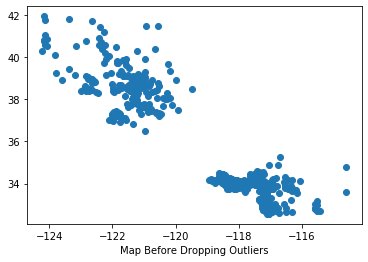

In [5]:
zcdb = ZipCodeDatabase()

# Iterrate over rows to add Lat and Long to dataframe
for index, row in complaints_df.iterrows():    
    zipcode = zcdb[index]
    complaints_df.set_value(index,'Latitude',zipcode.latitude)
    complaints_df.set_value(index,'Longitude',zipcode.longitude)

# Plot scatter plot with Long and Lat
plt.plot(complaints_df['Longitude'], complaints_df['Latitude'],'o')
plt.xlabel("Map Before Dropping Outliers")

Text(0, 0.5, 'Total Complaints Before Dropping Outliers')

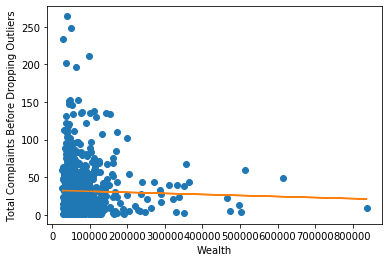

In [6]:
y = complaints_df['Total Complaints']
x = complaints_df['Wealth']

# Using scipy get some stats from the x and y data
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Calculate line of best fit
line = slope*x+intercept

# Plot our data
plt.plot(x, y,'o', x, line)
plt.xlabel('Wealth')
plt.ylabel('Total Complaints Before Dropping Outliers')

In [7]:
# Drop some outliers
complaints_df.drop( complaints_df[ complaints_df['Total Complaints'] < 5 ].index , inplace=True)
complaints_df.drop( complaints_df[ complaints_df['Wealth'] > 500000 ].index , inplace=True)

complaints_df.head()

,Checking or savings account,Consumer Loan,Credit reporting,"Credit reporting, credit repair services, or other personal consumer reports",Debt collection,Mortgage,Credit card or prepaid card,Student loan,Bank account or service,"Payday loan, title loan, or personal loan",...,Payday loan,Prepaid card,Money transfers,Other financial service,Number,Amount,Wealth,Total Complaints,Latitude,Longitude
90001,3.0,1.0,4.0,28.0,22.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,21670.0,619635.0,28594.139363,64.0,33.9731,-118.2479
90002,0.0,0.0,0.0,21.0,13.0,3.0,4.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,19890.0,563172.0,28314.328808,48.0,33.9497,-118.2462
90003,3.0,0.0,0.0,40.0,9.0,4.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,27290.0,730810.0,26779.406376,59.0,33.9653,-118.2727
90004,7.0,0.0,0.0,13.0,8.0,3.0,5.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,27810.0,1995586.0,71757.856886,41.0,34.0762,-118.3029
90005,1.0,0.0,5.0,5.0,7.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,15850.0,807743.0,50961.703470,23.0,34.0585,-118.3012


Text(0.5, 0, 'Map After Dropping Outliers')

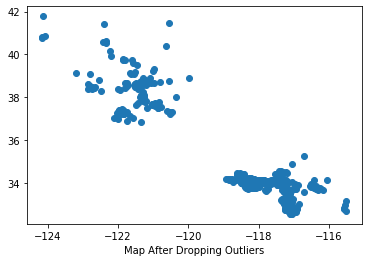

In [8]:
# Plot again after dropping outliers
plt.plot(complaints_df['Longitude'], complaints_df['Latitude'],'o')
plt.xlabel("Map After Dropping Outliers")

In [9]:
# Shows all the complaint categories and counts the number for each one
complaints_num_df = pd.DataFrame()
column_list = complaints_df.columns.tolist()

complaints_num_df['Number of Complaints'] = complaints_df.sum().astype(int)
complaints_num_df

,Number of Complaints
Checking or savings account,2066
Consumer Loan,50
Credit reporting,463
"Credit reporting, credit repair services, or other personal consumer reports",10390
Debt collection,3909
Mortgage,2574
Credit card or prepaid card,1867
Student loan,482
Bank account or service,160
"Payday loan, title loan, or personal loan",277


In [10]:
# Get rid of complaint types that have less than 1000 number of complaints
to_drop = (complaints_num_df[complaints_num_df['Number of Complaints'] < 1000].index).tolist()
complaints_df = complaints_df.drop(columns=to_drop)

complaints_df.head()

,Checking or savings account,"Credit reporting, credit repair services, or other personal consumer reports",Debt collection,Mortgage,Credit card or prepaid card,Number,Amount,Wealth,Total Complaints,Latitude
90001,3.0,28.0,22.0,6.0,0.0,21670.0,619635.0,28594.139363,64.0,33.9731
90002,0.0,21.0,13.0,3.0,4.0,19890.0,563172.0,28314.328808,48.0,33.9497
90003,3.0,40.0,9.0,4.0,1.0,27290.0,730810.0,26779.406376,59.0,33.9653
90004,7.0,13.0,8.0,3.0,5.0,27810.0,1995586.0,71757.856886,41.0,34.0762
90005,1.0,5.0,7.0,3.0,1.0,15850.0,807743.0,50961.703470,23.0,34.0585


In [11]:
# Create index columns for the larger complaint types.
# these were created by dividing the amount of these complaints
# by the total complaints for the zip code to get out the frequency
# that a certain zip code complains about certain things
complaints_df['Checking or savings account index'] = complaints_df['Checking or savings account'] / complaints_df['Total Complaints']
complaints_df['Credit reporting, credit repair services, or other personal consumer reports index'] = complaints_df['Credit reporting, credit repair services, or other personal consumer reports'] / complaints_df['Total Complaints']
complaints_df['Debt collection index'] = complaints_df['Debt collection'] / complaints_df['Total Complaints']
complaints_df['Mortgage index'] = complaints_df['Mortgage'] / complaints_df['Total Complaints']
complaints_df['Credit card or prepaid card index'] = complaints_df['Credit card or prepaid card'] / complaints_df['Total Complaints']

# Total complaint score = ( Total Complaints / Number of returns ) * 1000
complaints_df['Total Complaints Score'] = complaints_df['Total Complaints'] / complaints_df['Number'] * 1000

complaints_df.head()

,Checking or savings account,"Credit reporting, credit repair services, or other personal consumer reports",Debt collection,Mortgage,Credit card or prepaid card,Number,Amount,Wealth,Total Complaints,Latitude,Checking or savings account index,"Credit reporting, credit repair services, or other personal consumer reports index",Debt collection index,Mortgage index,Credit card or prepaid card index,Total Complaints Score
90001,3.0,28.0,22.0,6.0,0.0,21670.0,619635.0,28594.139363,64.0,33.9731,0.046875,0.437500,0.343750,0.093750,0.000000,2.953392
90002,0.0,21.0,13.0,3.0,4.0,19890.0,563172.0,28314.328808,48.0,33.9497,0.000000,0.437500,0.270833,0.062500,0.083333,2.413273
90003,3.0,40.0,9.0,4.0,1.0,27290.0,730810.0,26779.406376,59.0,33.9653,0.050847,0.677966,0.152542,0.067797,0.016949,2.161964
90004,7.0,13.0,8.0,3.0,5.0,27810.0,1995586.0,71757.856886,41.0,34.0762,0.170732,0.317073,0.195122,0.073171,0.121951,1.474290
90005,1.0,5.0,7.0,3.0,1.0,15850.0,807743.0,50961.703470,23.0,34.0585,0.043478,0.217391,0.304348,0.130435,0.043478,1.451104


Text(0.5, 0, 'Wealth')

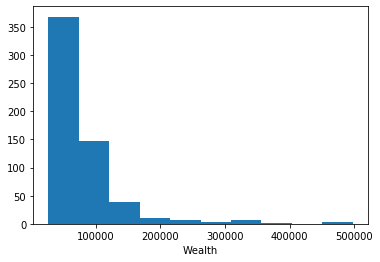

In [12]:
plt.hist(complaints_df['Wealth'])
plt.xlabel('Wealth')

Text(0.5, 0, 'Total Complaints Score')

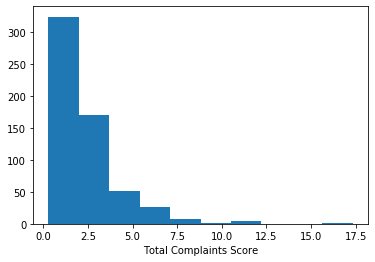

In [13]:
plt.hist(complaints_df['Total Complaints Score'])
plt.xlabel('Total Complaints Score')

Text(0, 0.5, 'Total Complaints Score')

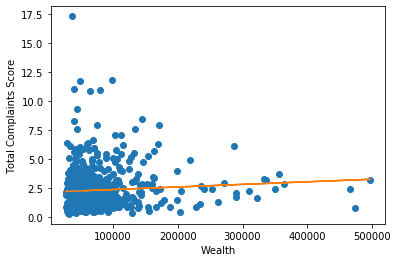

In [14]:
y = complaints_df['Total Complaints Score']
x = complaints_df['Wealth']

# Using scipy get some stats from the x and y data
slope, intercept, r_value_total_complaints, p_value_total_complaints, std_err = stats.linregress(x, y)

# Calculate line of best fit
line = slope*x+intercept

# Plot our data
plt.plot(x, y,'o', x, line)
plt.xlabel('Wealth')
plt.ylabel('Total Complaints Score')

Text(0, 0.5, 'Credit card or prepaid card index')

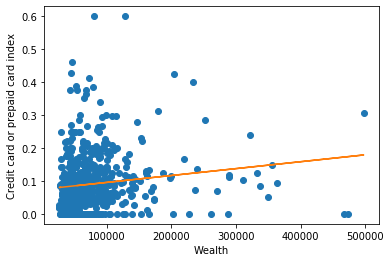

In [15]:
y = complaints_df['Credit card or prepaid card index']
x = complaints_df['Wealth']

# Using scipy get some stats from the x and y data
slope, intercept, r_value_account, p_value_account, std_err = stats.linregress(x, y)

# Calculate line of best fit
line = slope*x+intercept

# Plot our data
plt.plot(x, y,'o', x, line)
plt.xlabel('Wealth')
plt.ylabel('Credit card or prepaid card index')

Text(0, 0.5, 'Checking or savings account index')

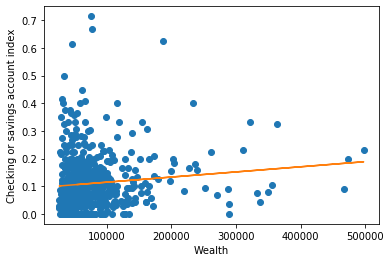

In [16]:
y = complaints_df['Checking or savings account index']
x = complaints_df['Wealth']

# Using scipy get some stats from the x and y data
slope, intercept, r_value_cards, p_value_cards, std_err = stats.linregress(x, y)

# Calculate line of best fit
line = slope*x+intercept

# Plot our data
plt.plot(x, y,'o', x, line)
plt.xlabel('Wealth')
plt.ylabel('Checking or savings account index')

Text(0, 0.5, 'Credit reporting, credit repair services, or other personal consumer reports index')

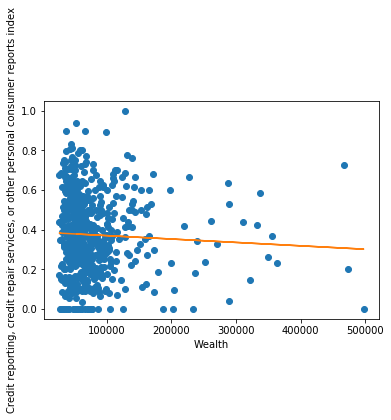

In [17]:
y = complaints_df['Credit reporting, credit repair services, or other personal consumer reports index']
x = complaints_df['Wealth']

# Using scipy get some stats from the x and y data
slope, intercept, r_value_credit, p_value_credit, std_err = stats.linregress(x, y)

# Calculate line of best fit
line = slope*x+intercept

# Plot our data
plt.plot(x, y,'o', x, line)
plt.xlabel('Wealth')
plt.ylabel('Credit reporting, credit repair services, or other personal consumer reports index')

Text(0, 0.5, 'Mortgage index')

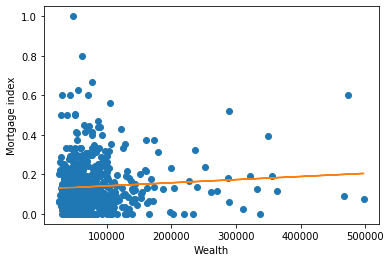

In [18]:
y = complaints_df['Mortgage index']
x = complaints_df['Wealth']

# Using scipy get some stats from the x and y data
slope, intercept, r_value_mortgage, p_value_mortgage, std_err = stats.linregress(x, y)

# Calculate line of best fit
line = slope*x+intercept

# Plot our data
plt.plot(x, y,'o', x, line)
plt.xlabel('Wealth')
plt.ylabel('Mortgage index')

Text(0, 0.5, 'Debt collection index')

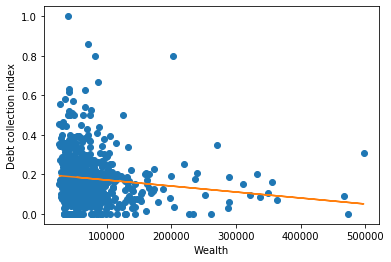

In [19]:
y = complaints_df['Debt collection index']
x = complaints_df['Wealth']

# Using scipy get some stats from the x and y data
slope, intercept, r_value_debt, p_value_debt, std_err = stats.linregress(x, y)

# Calculate line of best fit
line = slope*x+intercept

# Plot our data
plt.plot(x, y,'o', x, line)
plt.xlabel('Wealth')
plt.ylabel('Debt collection index')

In [20]:
def check_p_val(p_val, alpha = 0.05):

    if p_val < alpha:
        return 'We have evidence to reject the null hypothesis.'
    else:
        return 'We do not have evidence to reject the null hypothesis.'

print("Total Complaints Score p-value: " + str(p_value_total_complaints))
print(check_p_val(p_value_total_complaints))
print("Credit card or prepaid card index p-value: " + str(p_value_cards))
print(check_p_val(p_value_cards))
print("Credit reporting, credit repair services, or other personal consumer reports index p-value: " + str(p_value_account))
print(check_p_val(p_value_account))
print("Checking or savings account index p-value: " + str(p_value_credit))
print(check_p_val(p_value_credit))
print("Mortgage index p-value: " + str(p_value_mortgage))
print(check_p_val(p_value_mortgage))
print("Debt collection index p-value: " + str(p_value_debt))
print(check_p_val(p_value_debt))

print()

print("Total Complaints Score r-squared: " + str(r_value_total_complaints * r_value_total_complaints))
print("Credit card or prepaid card index r-squared: " + str(r_value_cards * r_value_cards))
print("Credit reporting, credit repair services, or other personal consumer reports index r-squared: " + str(r_value_account * r_value_account))
print("Checking or savings account index r-squared: " + str(r_value_credit * r_value_credit))
print("Mortgage index r-squared: " + str(r_value_mortgage * r_value_mortgage))
print("Debt collection index r-squared: " + str(r_value_debt * r_value_debt))


Total Complaints Score p-value: 0.08901403095114181
We do not have evidence to reject the null hypothesis.
Credit card or prepaid card index p-value: 0.007914388111044363
We have evidence to reject the null hypothesis.
Credit reporting, credit repair services, or other personal consumer reports index p-value: 0.0008884173629271891
We have evidence to reject the null hypothesis.
Checking or savings account index p-value: 0.2334688942785364
We do not have evidence to reject the null hypothesis.
Mortgage index p-value: 0.07170445922293184
We do not have evidence to reject the null hypothesis.
Debt collection index p-value: 0.0016364946328028076
We have evidence to reject the null hypothesis.

Total Complaints Score r-squared: 0.004944227641171785
Credit card or prepaid card index r-squared: 0.012014197743785314
Credit reporting, credit repair services, or other personal consumer reports index r-squared: 0.018753799687382368
Checking or savings account index r-squared: 0.002429950174866749

DATA ANALYSIS & RESULTS: This section should include markdown text and code walking us through the following: 
- EDA - What distributions do your variables take? 
- Are there any outliers? - Relationship between variables? - Analysis (Note that you will likely have to do some Googling for analytical approaches not discussed in 
class. This is expected for this project and an important skill for a data scientist to master.) 
- What approaches did you use? Why? - What were the results? - What were your interpretation of these findings. 


There must be at least three appropriate data visualizations​throughout these sections. Each visualization must included an interpretation of what is displayed *and* what should be learned from that visualization. Be sure that the appropriate type of visualization is generated given the data that you have, axes are all labeled, and the visualizations clearly communicate the point you’re trying to make. 

ETHICS & PRIVACY: 
Briefly acknowledge and address any potential issues of ethics and privacy for the proposed project. In particular: 
- Did you have permission to use this data, for this purpose? - Are there privacy concerns regarding your datasets that you need to deal with, and/or terms of use that 
you need to comply with? - Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that 
may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?) - Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic 
in terms of data privacy and equitable impact? - How did you handle issues you identified? 
(1-2 paragraphs) 


CONCLUSION & DISCUSSION: Discuss your project. Summarize your data and question. Briefly describe your analysis. Summarize your results and conclusions. Be sure to mention any limitations of your project. Discuss the impact of this work on society. (2-3 paragraphs) 